In [1]:
import numpy as np
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, mu1, mu2, F1, F2, o1, o2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + mu1*(x1-L1)**3.0 - k2 * (x1 - x2 - L2) + mu2*(x1 - x2 - L2)**3.0 + F1 * np.cos(o1 * t)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + mu2*(x2 - x1 - L2)**3.0 + F2 * np.cos(o2 * t)) / m2]
    return f

In [2]:
#Ejercicio 4.1 : m1=m2=1,k1=0.4 y k2=1, b1=1/10 y b2=1/15, mu1=1/6 y mu2=1/10, F1=1/3 y F2=1/5, o1=1 y o2=3/5
# (x1,y1,x2,y2)=(0.7,0,0.1,0)
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 2.0/5.0
k2 = 1.0
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.1
b2 = 1.0/5.0
# Non-linear coefficients
mu1 = 1.0/6.0
mu2 = 1.0/10.0
# Forcing Amplitudes
F1 = 1.0/3.0
F2 = 1.0/5.0
# Forcing frequencies
o1 = 1.0
o2 = 3.0/5.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.7
y1 = 0.0
x2 = 0.1
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 170.0
numpoints = 2250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, mu1, mu2, F1, F2, o1, o2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejercicio41.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

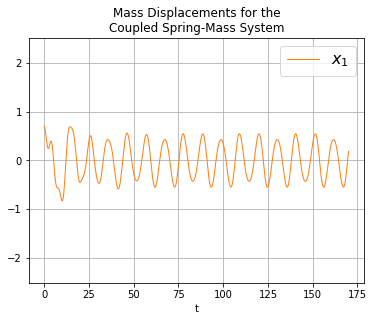

In [3]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylim, xlim
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejercicio41.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

ylim(-2.5, 2.5)

plot(t, x1, 'tab:orange', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
savefig('ejercicio41-x1.png', dpi=100)

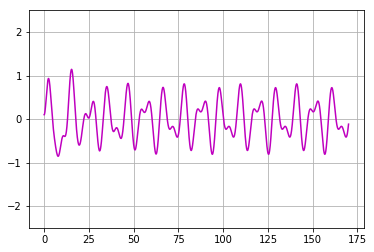

In [4]:
import matplotlib as mpl
%matplotlib inline
plot(t,x2,'m')
grid(True)
ylim(-2.5, 2.5)
mpl.pyplot.axis('on')
savefig('ejercicio41-x2.png', dpi=100)

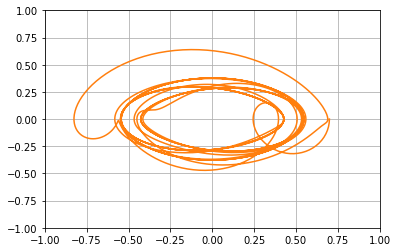

In [5]:
import matplotlib as mpl
%matplotlib inline
plot(x1,y1,'tab:orange')
xlim(-1,1)
ylim(-1,1)
grid(True)
mpl.pyplot.axis('on')
savefig('ejercicio41-phase-x1.png', dpi=100)

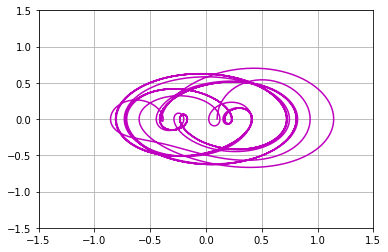

In [6]:
import matplotlib as mpl
%matplotlib inline
plot(x2,y2,'m')
xlim(-1.5,1.5)
ylim(-1.5,1.5)
grid(True)
mpl.pyplot.axis('on')
savefig('ejercicio41-phase-x2.png', dpi=100)

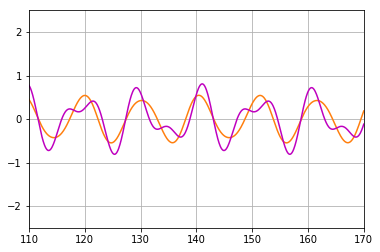

In [7]:
import matplotlib as mpl
%matplotlib inline
plot(t,x1,'tab:orange')
plot(t,x2,'m')
ylim(-2.5,2.5)
xlim(110,170)
grid(True)
mpl.pyplot.axis('on')
savefig('ejercicio41-sync.png', dpi=100)

In [8]:
#Ejercicio 4.1 : m1=m2=1,k1=0.4 y k2=1, b1=1/10 y b2=1/15, mu1=1/6 y mu2=1/10, F1=1/3 y F2=1/5, o1=1 y o2=3/5
# (x1,y1,x2,y2)=(0.7,0,0.1,0)
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 2.0/5.0
k2 = 1.0
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.1
b2 = 1.0/5.0
# Non-linear coefficients
mu1 = 1.0/6.0
mu2 = 1.0/10.0
# Forcing Amplitudes
F1 = 1.0/3.0
F2 = 1.0/5.0
# Forcing frequencies
o1 = 1.0
o2 = 3.0/5.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.7
y1 = 0.0
x2 = 0.1
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 2000.0
numpoints = 2250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, mu1, mu2, F1, F2, o1, o2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejercicio41-l.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

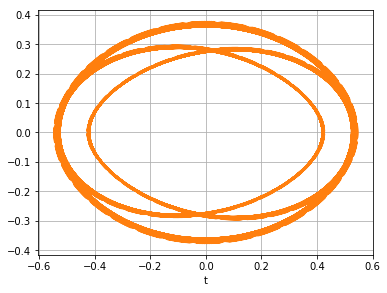

In [9]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, xlim, ylim
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejercicio41-l.dat', unpack=True, skiprows=753)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(x1, y1, 'tab:orange', linewidth=lw)

savefig('ejercicio41-limit-x1.png', dpi=100)

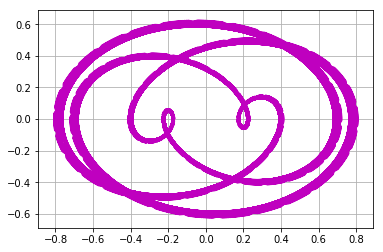

In [10]:
import matplotlib as mpl
%matplotlib inline
plot(x2,y2,'m')
grid(True)
mpl.pyplot.axis('on')
savefig('ejercicio41-limit-x2.png', dpi=100)

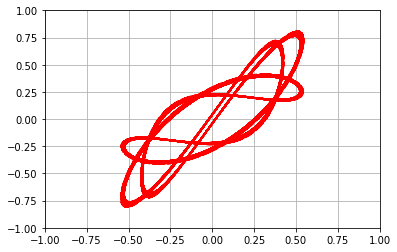

In [11]:
import matplotlib as mpl
%matplotlib inline
plot(x1,x2,'r')
ylim(-1,1)
xlim(-1,1)
grid(True)
mpl.pyplot.axis('on')
savefig('ejercicio41-versus.png', dpi=100)